## Exercise 2

Take an idealised pendulum: a weightless string of length $\ell$, fixed at one end with a mass $m$ at the other. The pendulum:
- Is free to swing in a plane subject to gravity.
- Has a friction proportional to its velocity $v$.
- May be driven by an external periodic force $F_d \cos {\omega_d t}$.

We want to consider angular displacement, so substitute $\dot{x} = \ell \dot{\theta}$ and $\ddot{x} = \ell \ddot{\theta}$, and now apply the driving force 

$$ m \ell \ddot{\theta} + k \ell \dot{\theta} + mg \sin{\theta} = F_d \cos {\omega_d t} $$

We can re-write this 2nd order ODEs as a set of coupled first-order ODEs:

Let $y_0 = \theta$, $y_1 = \dot{\theta}$ and $y_2 = \ddot{\theta}$:

$$ 
\begin{align*}
y_0' &= y_1 = \dot{\theta} \\
y_1' &= y_2 = \ddot{\theta} = -\frac{k}{m}\dot{\theta} - \frac{g}{\ell} \sin{\theta} + \frac{F_d}{m \ell} cos{\omega_d t}
\end{align*}
$$


Using a simple change of variable: $\alpha = g/\ell$, $\beta = k/m$ and $\gamma = F/m\ell$

$$
\begin{align*}
y_0' &= y_1 \\
y_1' &= -\alpha \sin{y_0} -\beta y_1 + \gamma \cos{\omega t}
\end{align*}
$$

Using the Runge-Kutta(4) method described in ODE_exercises:

1. Solve without friction & external force.
2. Solve without external force.
3. Solve without friction.
4. Solve for all forces!



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

Ayuda: Encabezado de la función

In [3]:
# pendulo amortiguado con fuerza externa y friccion.
    # Input:
    # t: tiempo
    # y: vector del péndulo [ángulo, vel angular] 
    # args['alpha']: g/l_pendulo
    # args['beta']: fr/m_pendulo
    # args['gamma']: F_ext/(m_pendulo*l_pendulo)
    # args['omega']: freq_ext
# Output: dydt, arreglo de solución

def pendulo(t,y,args):
    dydt = zeros(2)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin(y[0]) - args['beta']*y[1] + args['gamma']*cos(args['omega']*t)
    return dydt
    

Supuestos
- Friccion cero
- F_ext cero

In [4]:
#parámetros
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 0. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 200 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo


In [5]:
# definir los argumentos
args_sol = {}
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext



In [6]:
# Condiciones Iniciales
# angulos pequeños
theta_0 = pi/16
w_0 = 0
c_i = array([theta_0,w_0])

In [7]:
y = m_rungekutta4(pendulo, c_i, t, args_sol)
# solución analítica
# x peq, ==> sin(x)~x.  y = theta0*cos(sqrt(alpha)*t)
y_theta_peq = theta_0 * cos(sqrt(args_sol['alpha'])*t)


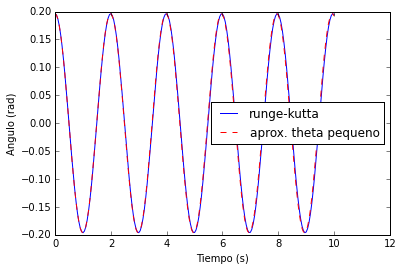

In [11]:
# Grafique la dinámica
plt.plot(t, y[:,0], c='b', label='runge-kutta')
plt.plot(t, y_theta_peq, 'r--', label='aprox. theta pequeno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Angulo (rad)')
plt.legend(loc='best')

In [14]:
def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:N/2]*2*pi, abs(y_fft[:N/2]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')

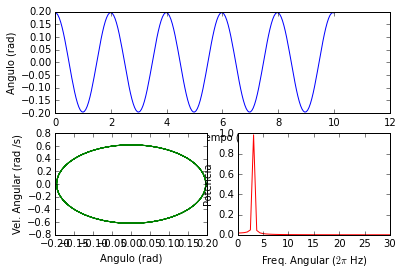

In [15]:
graficar_fase_pendulo(t,y)

Supuestos
- con friccion

In [16]:
fr = 0.8 #kg/(m*s)
args_sol['beta'] = fr/m_pendulo
y = m_rungekutta4(pendulo, c_i, t, args_sol)

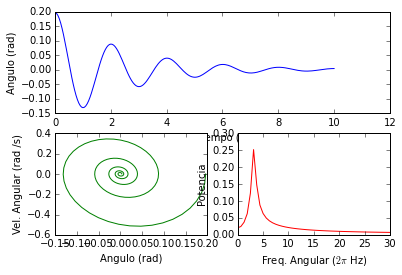

In [17]:
graficar_fase_pendulo(t,y)

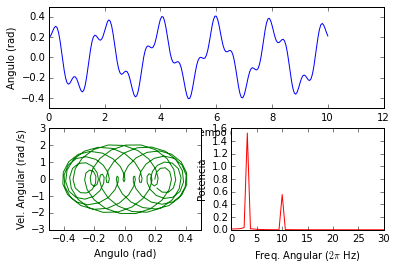

In [18]:
fr = 0 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

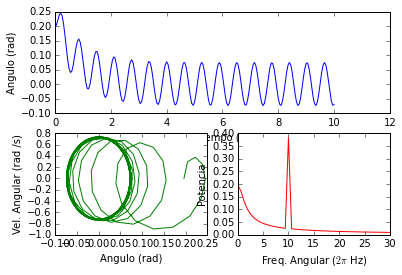

In [19]:
fr = 10 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

## Other Methods

### The Two-Step Adams-Bashforth Method

Remember that with these different methods, we're always looking to do the same thing: to choose a numerical approximation to the integral in

$$ y(t_{n+1}) = y(t_n) + \int_{t_n}^{t_{n+1}} \! f(t,y(t)) \, \mathrm{d}t. $$

So far, we've looked at **single-step** methods where we only use one known point to estimate the next one. But one way to improve the accuracy of our method is to use more known points. Such approximations are called **multistep methods**, and we'll look at an example now. 

Where the Expliit Euler method takes the slope $f$ to be a constant on the interval $[t_n, t_{n+1}]$, the idea behind _Adams-Bashforth_ methods is to approxmiate $f$ by a [Lagrange interpolating polynomial](lagrange):

$$ P(t) = \sum_{j=1}^{m}{P_j(t)}   $$

where

$$ P_j(t) = y_j \prod_{\substack{k=1 \\ k \ne j}}^{m}{ \frac{t - t_k}{t_j - t_k} }. $$

Here $P(t)$ is the polynomial of degree $\le (m-1)$ that passes through the $m$ points $(t_1, y_1 = f(t_1))$, $(t_2, y_2 = f(t_2))$ $\dots$ $(t_m, y_m = f(t_m))$. We'll take the linear $(m = 2)$ interpolant on the point $t_{n}$ and an earlier point $t_{n-1}$, so we have

$$ P(t) = f(t_n, y_n)\frac{t - t_{n-1}}{t_n - t_{n-1}} + f(t_{n-1}, y_{n-1})\frac{t - t_{n}}{t_{n-1} - t_n}. $$

Now if we put this approximating polynomial into the integral of, we find

\begin{align}
\int_{t_n}^{t_{n+1}} \! f(t,y(t)) \, \mathrm{d}t \approx \int_{t_n}^{t_{n+1}} \! P(t) \, \mathrm{d}t &= \int_{t_n}^{t_{n+1}} \! \left[ f(t_n, y_n)\frac{t - t_{n-1}}{t_n - t_{n-1}} + f(t_{n-1}, y_{n-1})\frac{t - t_{n}}{t_{n-1} - t_n} \right] \mathrm{d}t \\
&= \frac{(t_n - t_{n+1})}{2(t_{n-1}-t_n)} \left[ f(t_n,y_n)(t_n + t_{n+1} - 2t_{n-1}) - f(t_{n-1},y_{n-1})(t_n - t_{n+1}) \right]
\end{align}


#### Accuracy

Replacing $f(t,y(t))$ with the interpolant $P(t)$ [incurs a global error][wiki_order_cite] of order $\mathcal{O}(h^m)$, so in the case of the two-step method we have $\mathcal{O}(h^2)$. 

Note that if you follow the same derivation with $m = 1$ you get the Euler method — so the Euler method is also in fact the one-step Adams-Bashforth method. 

[wiki_order_cite]: http://en.wikipedia.org/wiki/Linear_multistep_method#CITEREFIserles1996